####Importing Libraries

In [262]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import tensorflow as tf



####Load Data

In [263]:
df = pd.read_csv('/content/drug200.csv')
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [264]:
df.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [265]:
df['Sex'].unique()

array(['F', 'M'], dtype=object)

In [266]:
df['BP'].unique()

array(['HIGH', 'LOW', 'NORMAL'], dtype=object)

In [267]:
df['Cholesterol'].unique()

array(['HIGH', 'NORMAL'], dtype=object)

In [268]:
df['Drug'].unique()

array(['DrugY', 'drugC', 'drugX', 'drugA', 'drugB'], dtype=object)

In [269]:
df['Drug'].value_counts()

DrugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: Drug, dtype: int64

In [270]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [271]:
df.corr()

<ipython-input-271-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Age,Na_to_K
Age,1.000000,-0.063119
Na_to_K,-0.063119,1.000000


####*VISUALISATION*

<ipython-input-272-b2378c9d8a20>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.Age)


<Axes: xlabel='Age', ylabel='Density'>

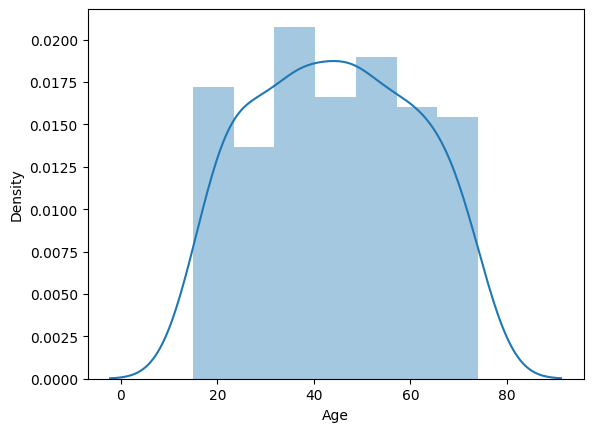

In [272]:
sns.distplot(df.Age)

<ipython-input-273-fda53b94c691>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.Na_to_K)


<Axes: xlabel='Na_to_K', ylabel='Density'>

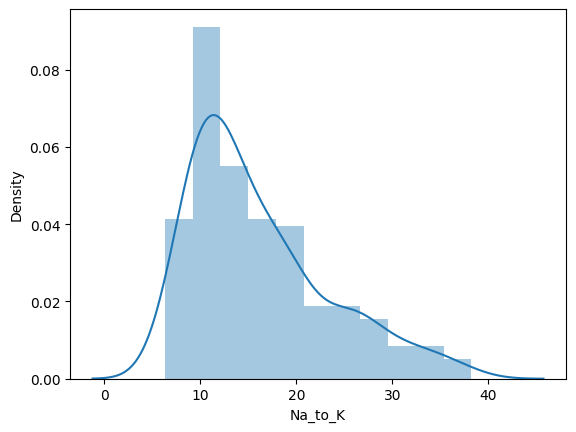

In [273]:
sns.distplot(df.Na_to_K)

<Axes: ylabel='Drug'>

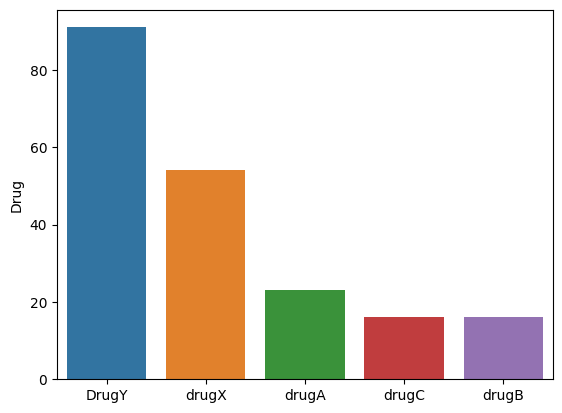

In [274]:
sns.barplot(x = df.Drug.value_counts().index, y = df.Drug.value_counts())

####Bivariate Analysis

<Axes: xlabel='Age', ylabel='Na_to_K'>

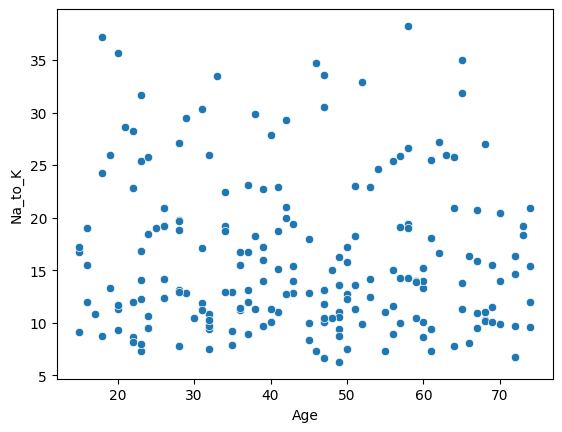

In [275]:
sns.scatterplot(x = df.Age, y = df.Na_to_K)

<Axes: xlabel='Age', ylabel='Na_to_K'>

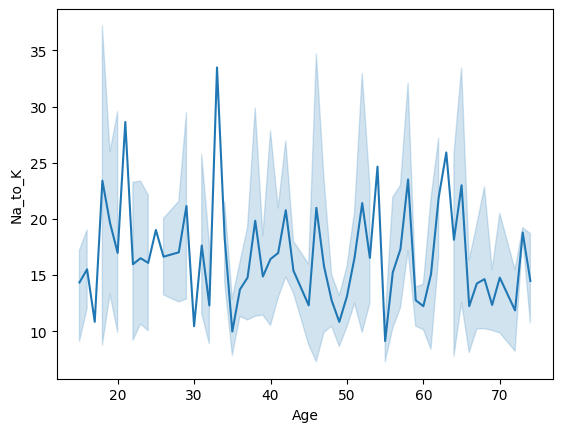

In [276]:
sns.lineplot(x = df.Age, y = df.Na_to_K)

####Multivariate Analysis

<ipython-input-277-fe43fffaf13b>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot = True)


<Axes: >

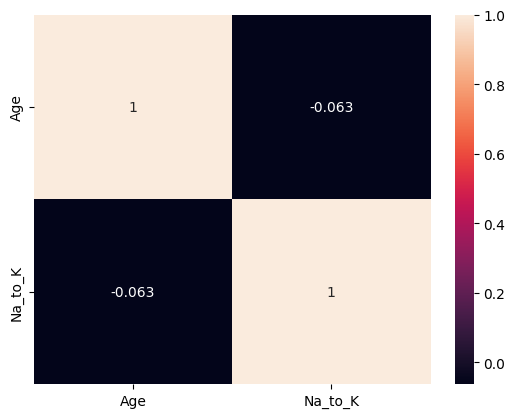

In [277]:
sns.heatmap(df.corr(), annot = True)

<Axes: >

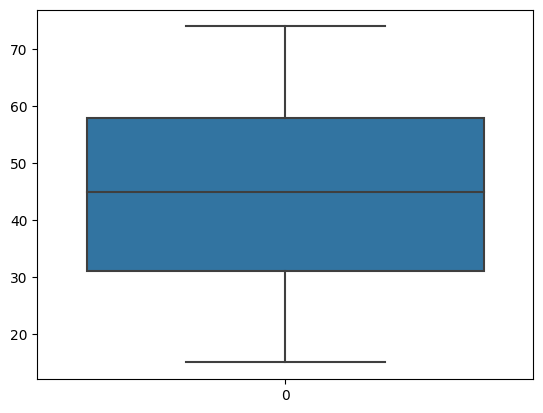

In [278]:
sns.boxplot(df.Age)

<Axes: >

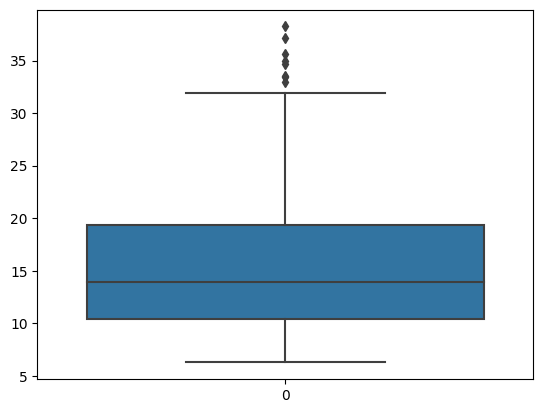

In [279]:
sns.boxplot(df.Na_to_K)

In [280]:
q1 = df.Na_to_K.quantile(.25)
q3 = df.Na_to_K.quantile(.75)

IQR = q3 - q1

upper_limit = q3+1.5*IQR
lower_limit = q1-1.5*IQR

In [281]:
df.median()

<ipython-input-281-6d467abf240d>:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.median()


Age        45.0000
Na_to_K    13.9365
dtype: float64

In [282]:
df['Na_to_K'] =np.where(df['Na_to_K']>upper_limit,30,df['Na_to_K'])

<Axes: >

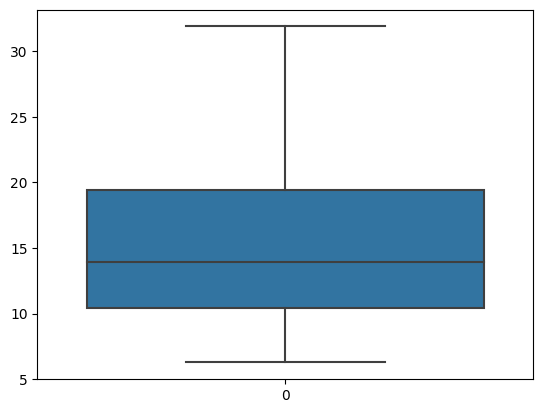

In [283]:
sns.boxplot(df.Na_to_K)

####Encoding

In [284]:
le = LabelEncoder()

In [285]:
df1 = df.copy()
df1.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [286]:
df1['Sex'] = le.fit_transform(df['Sex'])
df1.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,HIGH,HIGH,25.355,DrugY
1,47,1,LOW,HIGH,13.093,drugC
2,47,1,LOW,HIGH,10.114,drugC
3,28,0,NORMAL,HIGH,7.798,drugX
4,61,0,LOW,HIGH,18.043,DrugY


In [287]:
df1['BP'] = le.fit_transform(df['BP'])
df1.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,0,HIGH,25.355,DrugY
1,47,1,1,HIGH,13.093,drugC
2,47,1,1,HIGH,10.114,drugC
3,28,0,2,HIGH,7.798,drugX
4,61,0,1,HIGH,18.043,DrugY


In [288]:
df1['Cholesterol'] = le.fit_transform(df['Cholesterol'])
df1.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,0,0,25.355,DrugY
1,47,1,1,0,13.093,drugC
2,47,1,1,0,10.114,drugC
3,28,0,2,0,7.798,drugX
4,61,0,1,0,18.043,DrugY


####Splitting


In [289]:
x = df1.iloc[:,:-1]
x.head()

,Age,Sex,BP,Cholesterol,Na_to_K
0,23,0,0,0,25.355
1,47,1,1,0,13.093
2,47,1,1,0,10.114
3,28,0,2,0,7.798
4,61,0,1,0,18.043


In [290]:
df['Drug']

0      DrugY
1      drugC
2      drugC
3      drugX
4      DrugY
       ...  
195    drugC
196    drugC
197    drugX
198    drugX
199    drugX
Name: Drug, Length: 200, dtype: object

In [291]:
y = pd.get_dummies(df['Drug']).values
y[:10]

array([[1, 0, 0, 0, 0],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 1, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0]], dtype=uint8)

In [292]:
df1['Drug'].iloc[:10]

0    DrugY
1    drugC
2    drugC
3    drugX
4    DrugY
5    drugX
6    DrugY
7    drugC
8    DrugY
9    DrugY
Name: Drug, dtype: object

In [293]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.3,random_state=12)

In [294]:
x.shape, y.shape

((200, 5), (200, 5))

In [295]:
xtrain.shape, xtest.shape, ytrain.shape, ytest.shape   

((140, 5), (60, 5), (140, 5), (60, 5))

####ANN Model

In [296]:
model = Sequential()
# input layer
model.add(Dense(5, input_dim = 5, activation='relu'))

# hidden layers
model.add(Dense(8, activation='relu'))
model.add(Dense(14, activation='relu'))
model.add(Dense(8, activation='relu'))

# output layer
model.add(Dense(5, activation='softmax'))


In [297]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [298]:
model.summary()

Model: "sequential_28"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_140 (Dense)           (None, 5)                 30        
                                                                 
 dense_141 (Dense)           (None, 8)                 48        
                                                                 
 dense_142 (Dense)           (None, 14)                126       
                                                                 
 dense_143 (Dense)           (None, 8)                 120       
                                                                 
 dense_144 (Dense)           (None, 5)                 45        
                                                                 
Total params: 369
Trainable params: 369
Non-trainable params: 0
_________________________________________________________________


In [299]:
model.fit(xtrain, ytrain, epochs=10, batch_size=5, validation_data=(xtest,ytest))

Epoch 1/10
28/28 [==============================] - 1s 10ms/step - loss: 1.6424 - accuracy: 0.4571 - val_loss: 1.4868 - val_accuracy: 0.4500
Epoch 2/10
28/28 [==============================] - 0s 3ms/step - loss: 1.4307 - accuracy: 0.4571 - val_loss: 1.3382 - val_accuracy: 0.4500
Epoch 3/10
28/28 [==============================] - 0s 4ms/step - loss: 1.3270 - accuracy: 0.4571 - val_loss: 1.2543 - val_accuracy: 0.4500
Epoch 4/10
28/28 [==============================] - 0s 4ms/step - loss: 1.2420 - accuracy: 0.4571 - val_loss: 1.1843 - val_accuracy: 0.4500
Epoch 5/10
28/28 [==============================] - 0s 3ms/step - loss: 1.1889 - accuracy: 0.4571 - val_loss: 1.1403 - val_accuracy: 0.4833
Epoch 6/10
28/28 [==============================] - 0s 3ms/step - loss: 1.1556 - accuracy: 0.4857 - val_loss: 1.1269 - val_accuracy: 0.5000
Epoch 7/10
28/28 [==============================] - 0s 3ms/step - loss: 1.1228 - accuracy: 0.5071 - val_loss: 1.0795 - val_accuracy: 0.6167
Epoch 8/10
28/28 [=